# Poisoning Attack Spam Filter (Spam or Ham)

Code based on [Build a machine learning email spam detector with Python](https://blog.logrocket.com/email-spam-detector-python-machine-learning/

## Import Libraries

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm 
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import random

## Download Data and Process CSV

In [3]:
!wget https://raw.githubusercontent.com/SmallLion/Python-Projects/main/Spam-detection/spam.csv

--2022-04-22 14:04:39--  https://raw.githubusercontent.com/SmallLion/Python-Projects/main/Spam-detection/spam.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 499362 (488K) [text/plain]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 487.66K  --.-KB/s    in 0.04s   

2022-04-22 14:04:39 (12.9 MB/s) - ‘spam.csv’ saved [499362/499362]



In [4]:
spam = pd.read_csv('spam.csv')

## Split Dataset into Train and Test

In [14]:
print("Number of 'HAM' instances:", len([ y for y in spam["v1"] if y == 'ham']) )
print("Number of 'SPAM' instances:", len([ y for y in spam["v1"] if y == 'spam']) )

Number of 'HAM' instances: 4825
Number of 'SPAM' instances: 747


In [5]:
x = spam['v2']
y = spam["v1"]
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.2)
x_train, x_poisoning, y_train, y_poisoning = train_test_split(x_train, y_train,test_size = 0.5)

In [6]:
data_train_dic = {'x': x_train, 'y': y_train}
data_train = pd.DataFrame(data_train_dic)
data_test_dic = {'x': x_test, 'y': y_test}
data_test = pd.DataFrame(data_test_dic)
data_poisoning_dic = {'x': x_poisoning, 'y': y_poisoning}
data_poisoning = pd.DataFrame(data_poisoning_dic)

In [7]:
print("TRAIN DATA. size:", len(data_train))
print(data_train.head(10))

TRAIN DATA. size: 2228
                                                      x     y
4856  Thanks  and ! Or bomb and date as my phone wan...   ham
954           Filthy stories and GIRLS waiting for your  spam
1737  I cant pick the phone right now. Pls send a me...   ham
2571  ‰Û_ and don‰Û÷t worry we‰Û÷ll have finished by...   ham
1109                    S s..first time..dhoni rocks...   ham
2752                         Sat right? Okay thanks...    ham
4270  Natalja (25/F) is inviting you to be her frien...  spam
2990  HOT LIVE FANTASIES call now 08707509020 Just 2...  spam
4414  Yeah I should be able to, I'll text you when I...   ham
4755  Don't make life too stressfull.. Always find t...   ham


In [8]:
print("TEST DATA. size:", len(data_test))
print(data_test.head(10))

TEST DATA. size: 1115
                                                      x    y
3204  Oh, yes, I've just been a little under the wea...  ham
3604                    Jordan got voted out last nite!  ham
1986                           S..antha num corrct dane  ham
3406  Beautiful Truth against Gravity.. Read careful...  ham
706                      So when do you wanna gym harri  ham
3662  Frnd s not juz a word.....not merely a relatio...  ham
5244  thanks for the temales it was wonderful. Thank...  ham
2820              Oh god..taken the teeth?is it paining  ham
4811     fyi I'm at usf now, swing by the room whenever  ham
4869  Dip's cell dead. So i m coming with him. U bet...  ham


In [9]:
print("POISONING DATA. size:", len(data_poisoning))
print(data_poisoning.head(10))

POISONING DATA. size: 2229
                                                      x     y
3361       No messages on her phone. I'm holding it now   ham
622   MAKE SURE ALEX KNOWS HIS BIRTHDAY IS OVER IN F...   ham
203                            Goodmorning sleeping ga.   ham
1889                   I gotta collect da car at 6 lei.   ham
423   URGENT! Your Mobile number has been awarded wi...  spam
2493  they released another Italian one today and it...   ham
999           Aight will do, thanks again for comin out   ham
2814  Some are lasting as much as 2 hours. You might...   ham
5048  Edison has rightly said, \A fool can ask more ...   ham
1490  Cant believe i said so many things to you this...   ham


## Train Model

In [10]:
cv = CountVectorizer()
features = cv.fit_transform(x_train)

**Support Vector Machines for Classification**: finds a function that bests separates both categories.

In [11]:
model = svm.SVC()
model.fit(features,y_train)

SVC()

## Evaluate Model Accuracy

In [15]:
features_test = cv.transform(x_test)
print("Accuracy: {}".format(model.score(features_test,y_test)))

Accuracy: 0.968609865470852


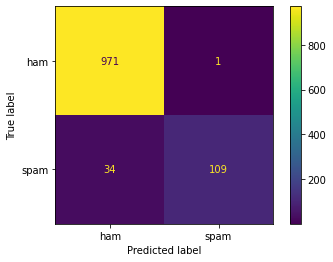

In [16]:
y_pred_test = model.predict(features_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

## Poisoning of Training Data and Re-train model

In [17]:
for i, y in enumerate(y_poisoning):
  if y == 'ham':
    y_poisoning.iloc[i] = 'spam'
  else:
    y_poisoning.iloc[i] = 'ham'


In [18]:
data_poisoning_dic = {'x': x_poisoning, 'y': y_poisoning}
data_poisoning = pd.DataFrame(data_poisoning_dic)
print("POISONED DATA. size:", len(data_poisoning))
print(data_poisoning.head(10))

POISONED DATA. size: 2229
                                                      x     y
3361       No messages on her phone. I'm holding it now  spam
622   MAKE SURE ALEX KNOWS HIS BIRTHDAY IS OVER IN F...  spam
203                            Goodmorning sleeping ga.  spam
1889                   I gotta collect da car at 6 lei.  spam
423   URGENT! Your Mobile number has been awarded wi...   ham
2493  they released another Italian one today and it...  spam
999           Aight will do, thanks again for comin out  spam
2814  Some are lasting as much as 2 hours. You might...  spam
5048  Edison has rightly said, \A fool can ask more ...  spam
1490  Cant believe i said so many things to you this...  spam


In [19]:
features = cv.fit_transform(pd.concat([x_train,x_poisoning]))

In [21]:
model = svm.SVC()
model.fit(features,pd.concat([y_train,y_poisoning]))

SVC()

## Evaluate Poisoned Model Accuracy

In [22]:
features_test = cv.transform(x_test)
print("Accuracy: {}".format(model.score(features_test,y_test)))

Accuracy: 0.5273542600896861


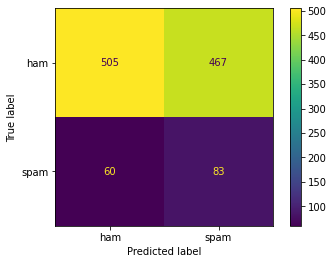

In [23]:
y_pred_test = model.predict(features_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

## SPAM only poisoning

In [40]:
y_spam_only = [ row['v1'] for index, row in spam.iterrows() if row['v1'] == 'spam']
x_spam_only = [ row['v2'] for index, row in spam.iterrows() if row['v1'] == 'spam']

In [41]:
data_spam_only_dic = {'x': x_spam_only, 'y': y_spam_only}
data_spam_only = pd.DataFrame(data_spam_only_dic)
y_spam_only = data_spam_only.y
x_spam_only = data_spam_only.x
print("POISONED DATA. size:", len(data_spam_only))
print(data_spam_only.head(10))

POISONED DATA. size: 747
                                                   x     y
0  Free entry in 2 a wkly comp to win FA Cup fina...  spam
1  FreeMsg Hey there darling it's been 3 week's n...  spam
2  WINNER!! As a valued network customer you have...  spam
3  Had your mobile 11 months or more? U R entitle...  spam
4  SIX chances to win CASH! From 100 to 20,000 po...  spam
5  URGENT! You have won a 1 week FREE membership ...  spam
6  XXXMobileMovieClub: To use your credit, click ...  spam
7  England v Macedonia - dont miss the goals/team...  spam
8  Thanks for your subscription to Ringtone UK yo...  spam
9  07732584351 - Rodger Burns - MSG = We tried to...  spam


In [42]:
for i, y in enumerate(y_spam_only):
  #if random.random() < 0.5:
  y_spam_only.loc[i] = 'ham'

In [43]:
print("POISONED DATA. size:", len(data_spam_only))
print(data_spam_only.head(10))

POISONED DATA. size: 747
                                                   x    y
0  Free entry in 2 a wkly comp to win FA Cup fina...  ham
1  FreeMsg Hey there darling it's been 3 week's n...  ham
2  WINNER!! As a valued network customer you have...  ham
3  Had your mobile 11 months or more? U R entitle...  ham
4  SIX chances to win CASH! From 100 to 20,000 po...  ham
5  URGENT! You have won a 1 week FREE membership ...  ham
6  XXXMobileMovieClub: To use your credit, click ...  ham
7  England v Macedonia - dont miss the goals/team...  ham
8  Thanks for your subscription to Ringtone UK yo...  ham
9  07732584351 - Rodger Burns - MSG = We tried to...  ham


In [44]:
features_spam_only = cv.fit_transform(pd.concat([x_spam_only, x_train]))

In [45]:
model_poisoning_spam = svm.SVC()
model_poisoning_spam.fit(features_spam_only,pd.concat([y_spam_only, y_train]))

SVC()

## Evaluate Poisoned Model Accuracy

In [46]:
features_test = cv.transform(x_test)
print("Accuracy: {}".format(model_poisoning_spam.score(features_test,y_test)))

Accuracy: 0.8717488789237668


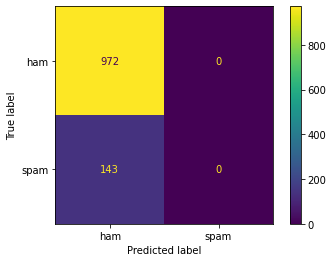

In [47]:
y_pred_test = model_poisoning_spam.predict(features_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()